In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df = pd.read_csv('google-data.csv', parse_dates = ['Date'])

In [4]:
data = pd.DataFrame()
data['Date']= pd.date_range(start = df.iloc[0,0], end = df.iloc[-1,0])
data = pd.merge(data,df,on='Date', how = 'left')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols = ['Open','High','Low','Close','Adj Close','Volume']

for col in cols:
  data[col] = data[col].interpolate(method = 'cubic')

In [6]:
model_df = df[['Date','Close']].rename(columns = {'Date': 'ds','Close' : 'y'})
model_df

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [8]:
model = Prophet(interval_width = 0.95)
model.fit(model_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp60f5j8yt/e2gppsav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp60f5j8yt/jg2armp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27854', 'data', 'file=/tmp/tmp60f5j8yt/e2gppsav.json', 'init=/tmp/tmp60f5j8yt/jg2armp8.json', 'output', 'file=/tmp/tmp60f5j8yt/prophet_modelsd2b7xp9/prophet_model-20231028203155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:31:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods = 100)
forecasts = model.predict(future)
forecasts

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,369.236057,329.601696,421.497526,369.236057,369.236057,4.305646,4.305646,4.305646,2.786466,2.786466,2.786466,1.519180,1.519180,1.519180,0.0,0.0,0.0,373.541703
1,2013-01-03,369.575985,330.553369,413.549939,369.575985,369.575985,2.650322,2.650322,2.650322,1.998060,1.998060,1.998060,0.652261,0.652261,0.652261,0.0,0.0,0.0,372.226307
2,2013-01-04,369.915913,325.563175,417.495379,369.915913,369.915913,2.246902,2.246902,2.246902,2.422152,2.422152,2.422152,-0.175249,-0.175249,-0.175249,0.0,0.0,0.0,372.162816
3,2013-01-07,370.935698,323.054600,416.744675,370.935698,370.935698,-0.451593,-0.451593,-0.451593,1.887105,1.887105,1.887105,-2.338698,-2.338698,-2.338698,0.0,0.0,0.0,370.484105
4,2013-01-08,371.275626,324.587917,418.575493,371.275626,371.275626,-0.705710,-0.705710,-0.705710,2.227399,2.227399,2.227399,-2.933108,-2.933108,-2.933108,0.0,0.0,0.0,370.569916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2018-04-04,1104.387974,1050.954763,1161.071270,1076.247785,1139.507860,-3.955773,-3.955773,-3.955773,2.786466,2.786466,2.786466,-6.742239,-6.742239,-6.742239,0.0,0.0,0.0,1100.432201
1355,2018-04-05,1105.059684,1045.837134,1158.451215,1076.511130,1140.791759,-5.587196,-5.587196,-5.587196,1.998060,1.998060,1.998060,-7.585256,-7.585256,-7.585256,0.0,0.0,0.0,1099.472488
1356,2018-04-06,1105.731394,1046.682358,1159.710185,1076.823929,1142.071520,-5.935741,-5.935741,-5.935741,2.422152,2.422152,2.422152,-8.357893,-8.357893,-8.357893,0.0,0.0,0.0,1099.795653
1357,2018-04-07,1106.403104,1038.789452,1149.363482,1076.804544,1143.149422,-14.716174,-14.716174,-14.716174,-5.660592,-5.660592,-5.660592,-9.055582,-9.055582,-9.055582,0.0,0.0,0.0,1091.686931


<Figure size 640x480 with 0 Axes>

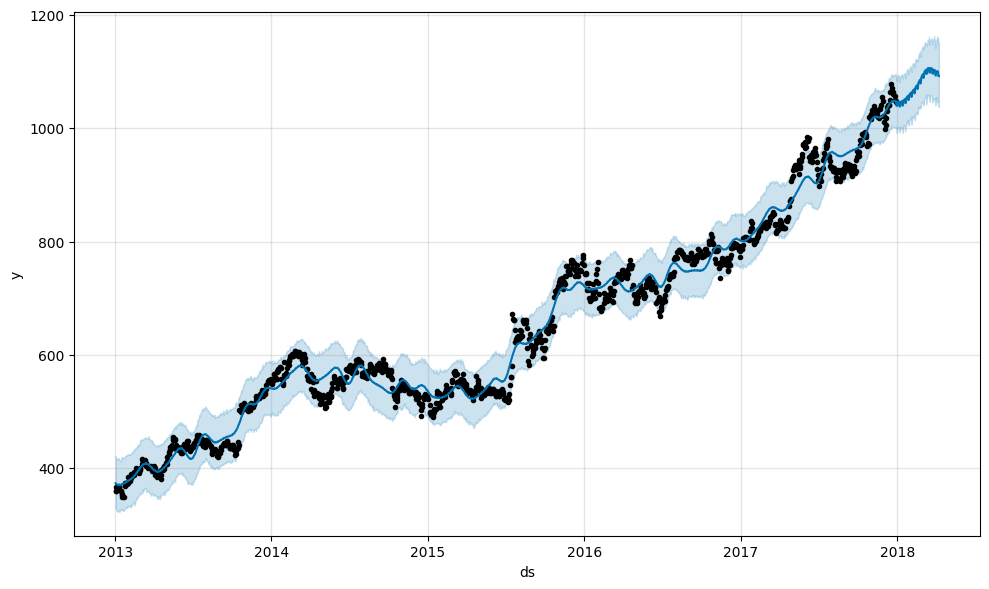

In [11]:
plt.figure()
model.plot(forecasts)
plt.show()

In [12]:
from sklearn.model_selection import ParameterGrid

In [13]:
parameters = {
    "changepoint_prior_scale" : [0.1,0.2],
    "n_changepoints" : [1,5],
    "holidays_prior_scale" : [0.1,0.2],
    "seasonality_mode" : ['multiplicative','additive']
    }

parameter_grid = ParameterGrid(parameters)

In [14]:
parameter_list = []

for p in parameter_grid:
  print(p)
  model = Prophet(changepoint_prior_scale= p['changepoint_prior_scale'],
                  n_changepoints = p['n_changepoints'],
                  holidays_prior_scale=p['holidays_prior_scale'],
                  seasonality_mode = p['seasonality_mode'],
                  interval_width = 0.95)
model.fit(model_df)
future = model.make_future_dataframe(periods = 100,freq = 'D')
forecast = model.predict(future)
predicted = forecast[['ds','yhat']]
actual = model_df

mpe = np.mean((predicted['yhat'] - actual['y']/actual['y']))
print("MPE is ",mpe)
parameter_list.append([mpe,p])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp60f5j8yt/8y9wuhs2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp60f5j8yt/2x1h9eyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46017', 'data', 'file=/tmp/tmp60f5j8yt/8y9wuhs2.json', 'init=/tmp/tmp60f5j8yt/2x1h9eyk.json', 'output', 'file=/tmp/tmp60f5j8yt/prophet_model2i0b6nlu/prophet_model-20231028210041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:00:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale':

21:00:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MPE is  651.6583566318156


In [15]:
parameters_df = pd.DataFrame(parameter_list, columns = ['MPE','P'])
parameters_df = parameters_df.sort_values(by = 'MPE')

In [16]:
print('Lowest mpe:', parameters_df.iloc[0, :][0])
print("parameters:", parameters_df.iloc[0,:][1])

Lowest mpe: 651.6583566318156
parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}
